<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


{'Task 1 - Missing Values': date            0
 datetime        0
 cash_type       0
 card           89
 money           0
 coffee_name     0
 hour            0
 day             0
 month           0
 dtype: int64,
 'Task 2 - Total Sales': 37508.88,
 'Task 3 - Most Popular Coffee': coffee_name
 Americano with Milk    268
 Latte                  243
 Cappuccino             196
 Americano              169
 Cortado                 99
 Hot Chocolate           74
 Espresso                49
 Cocoa                   35
 Name: count, dtype: int64,
 'Task 6 - Payment Type Distribution': cash_type
 card    1044
 cash      89
 Name: count, dtype: int64,
 'Task 8 - Top 5 Customers': card
 ANON-0000-0000-0012    2593.18
 ANON-0000-0000-0009    2212.70
 ANON-0000-0000-0097     882.22
 ANON-0000-0000-0040     706.36
 ANON-0000-0000-0003     651.96
 Name: money, dtype: float64,
 'Task 9 - Revenue by Coffee Type': coffee_name
 Latte                  9009.14
 Americano with Milk    8601.94
 Cappuccino   

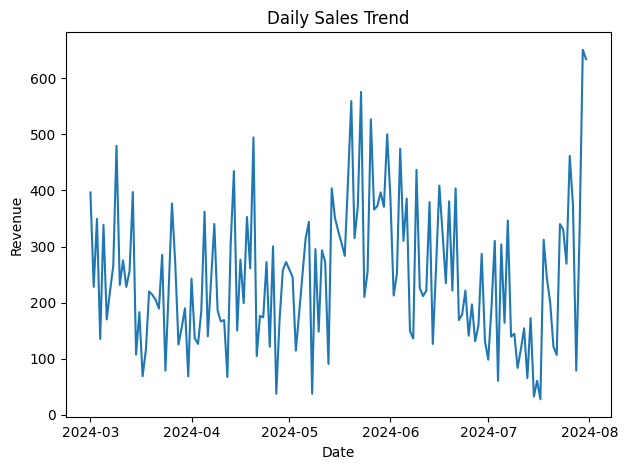

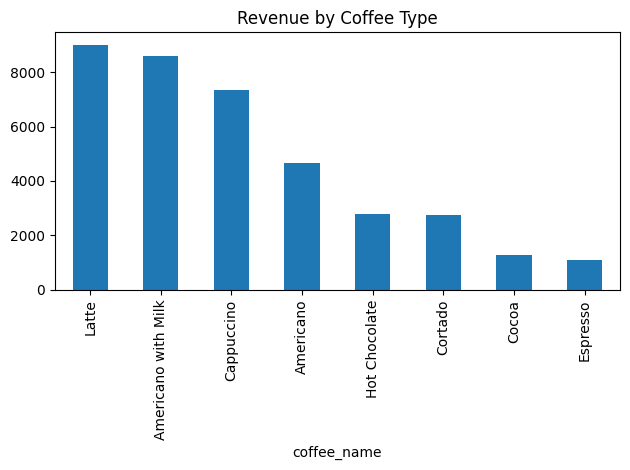

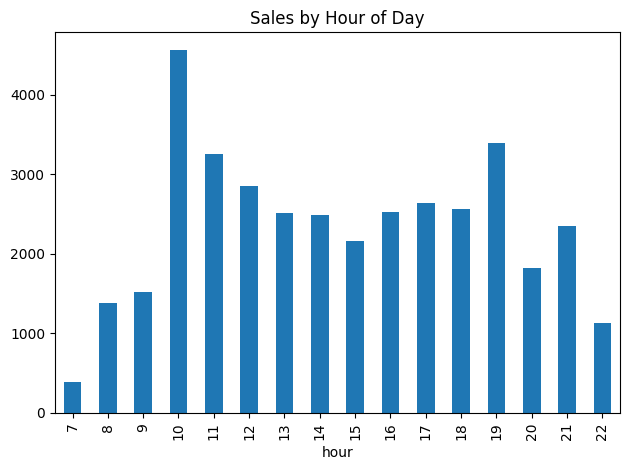

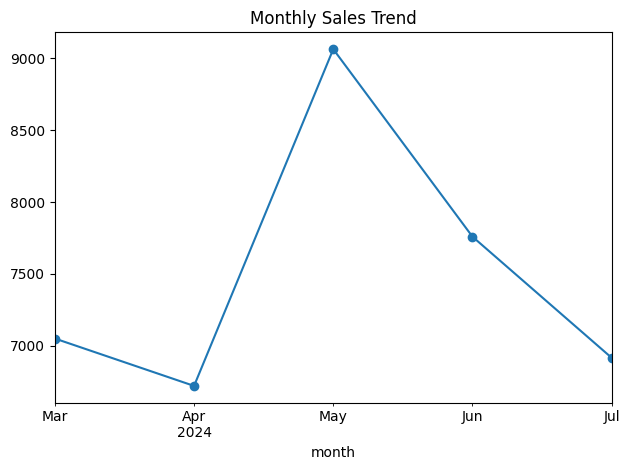

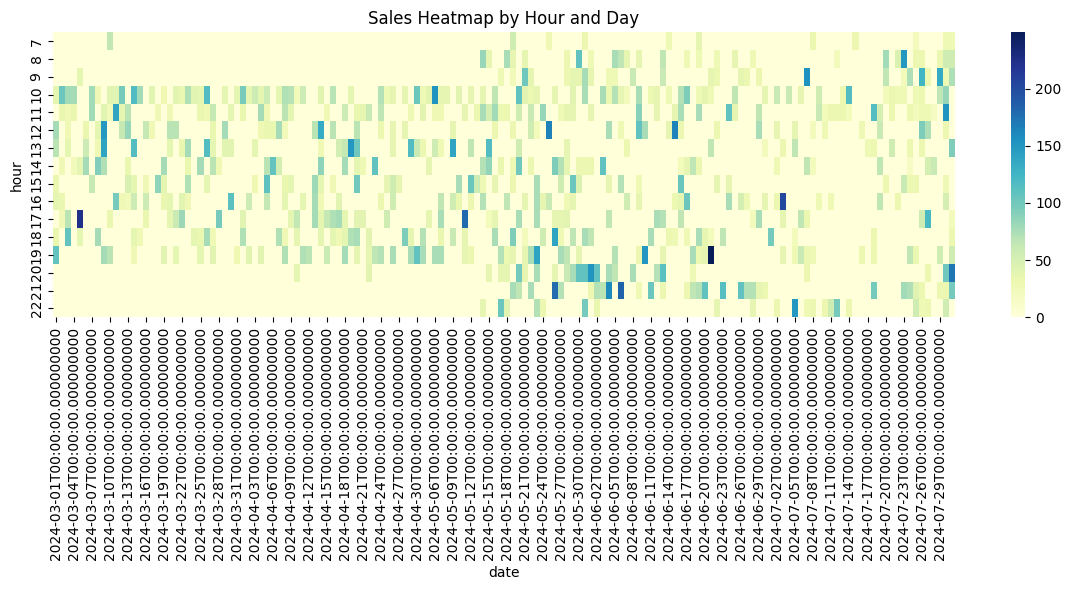

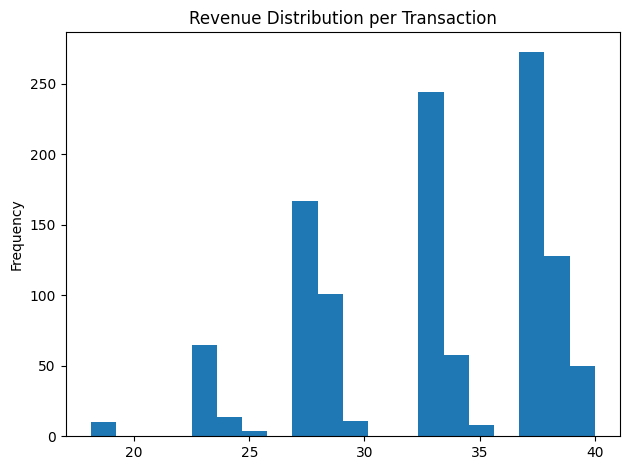

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the uploaded Excel (CSV) file
file_path = '/kaggle/input/coffee-sales-unified/index.csv'
df = pd.read_csv(file_path)

# Display the first few rows and general info to understand the structure
df.head(), df.info()

# Convert date and datetime columns
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.date
df['month'] = df['datetime'].dt.to_period('M')

# Prepare output dictionary
task_outputs = {}

# Task 1: Data Cleaning Summary
task_outputs['Task 1 - Missing Values'] = df.isnull().sum()

# Task 2: Total Sales Summary
task_outputs['Task 2 - Total Sales'] = df['money'].sum()

# Task 3: Most Popular Coffee
task_outputs['Task 3 - Most Popular Coffee'] = df['coffee_name'].value_counts()

# Task 4: Daily Sales Trend
daily_sales = df.groupby('day')['money'].sum()
fig1, ax1 = plt.subplots()
daily_sales.plot(kind='line', ax=ax1, title='Daily Sales Trend', xlabel='Date', ylabel='Revenue')
fig1.tight_layout()

# Task 5: Sales by Coffee Type
coffee_sales = df.groupby('coffee_name')['money'].sum().sort_values(ascending=False)
fig2, ax2 = plt.subplots()
coffee_sales.plot(kind='bar', ax=ax2, title='Revenue by Coffee Type')
fig2.tight_layout()

# Task 6: Payment Type Analysis
payment_type = df['cash_type'].value_counts()
task_outputs['Task 6 - Payment Type Distribution'] = payment_type

# Task 7: Hourly Sales Trend
hourly_sales = df.groupby('hour')['money'].sum()
fig3, ax3 = plt.subplots()
hourly_sales.plot(kind='bar', ax=ax3, title='Sales by Hour of Day')
fig3.tight_layout()

# Task 8: Top 5 Spending Customers (by card)
top_customers = df[df['card'].notna()].groupby('card')['money'].sum().sort_values(ascending=False).head(5)
task_outputs['Task 8 - Top 5 Customers'] = top_customers

# Task 9: Revenue by Coffee Type (already done in Task 5)
task_outputs['Task 9 - Revenue by Coffee Type'] = coffee_sales

# Task 10: Card vs Cash Sales Revenue
revenue_by_type = df.groupby('cash_type')['money'].sum()
task_outputs['Task 10 - Revenue by Payment Type'] = revenue_by_type

# Task 11: Monthly Sales Trend
monthly_sales = df.groupby('month')['money'].sum()
fig4, ax4 = plt.subplots()
monthly_sales.plot(kind='line', ax=ax4, title='Monthly Sales Trend', marker='o')
fig4.tight_layout()

# Task 12: Heatmap - Hour vs Day Sales
heatmap_data = df.groupby(['date', 'hour'])['money'].sum().unstack().fillna(0)
fig5, ax5 = plt.subplots(figsize=(12, 6))
sns.heatmap(heatmap_data.T, cmap='YlGnBu', ax=ax5)
ax5.set_title('Sales Heatmap by Hour and Day')
fig5.tight_layout()

# Task 13: Average Revenue per Transaction
task_outputs['Task 13 - Avg Revenue/Transaction'] = df['money'].mean()

# Task 14: Revenue Distribution (Histogram)
fig6, ax6 = plt.subplots()
df['money'].plot(kind='hist', bins=20, ax=ax6, title='Revenue Distribution per Transaction')
fig6.tight_layout()

# Task 15: Unique Customers per Coffee Type
unique_customers = df[df['card'].notna()].groupby('coffee_name')['card'].nunique()
task_outputs['Task 15 - Unique Customers per Coffee Type'] = unique_customers

# Return only outputs (no plots for now)
task_outputs
